### **KNN CLASSIFICATION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **DATASET GATHERING**

In [ ]:
url="https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

In [ ]:
iris=pd.read_csv(url)


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


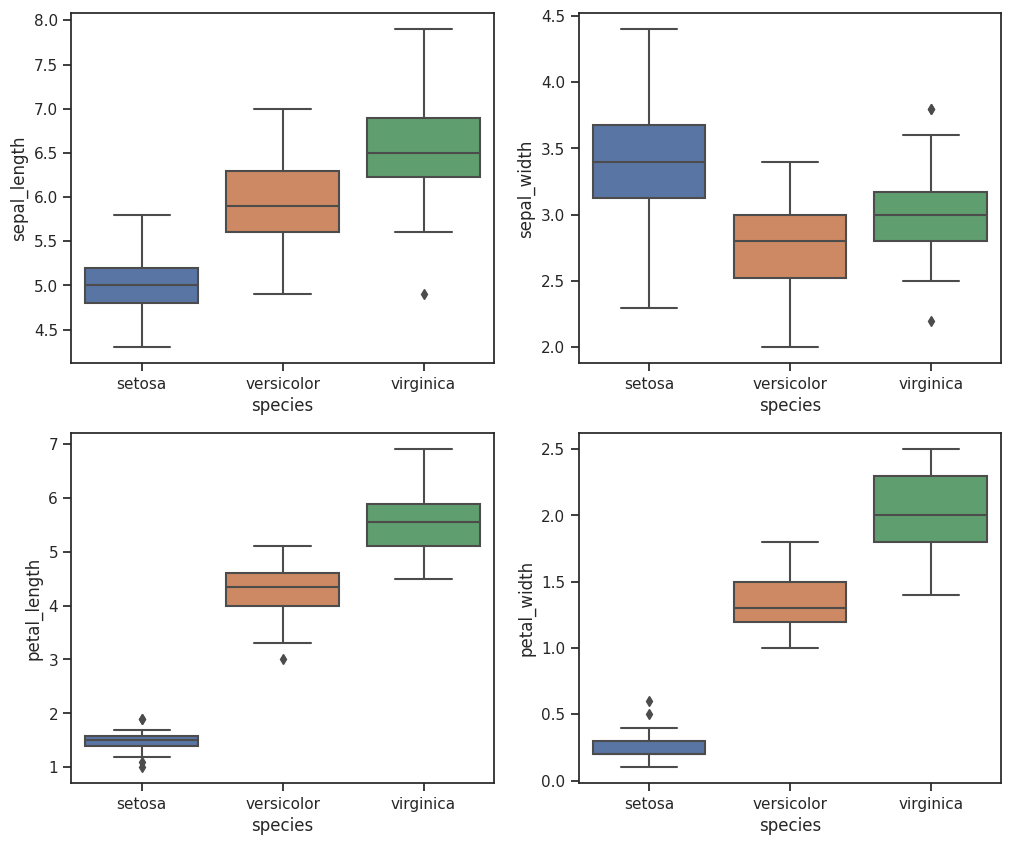

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.show()

After plotting boxplot we can figure out outliers

In [ ]:
iris[20:25]

,sepal_length,sepal_width,petal_length,petal_width,species
20,5.4,3.4,1.7,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
22,4.6,3.6,1.0,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
24,4.8,3.4,1.9,0.2,setosa


Dividing the data into dependent variable and independent variables

In [ ]:
X=iris.drop(columns=['species'])
Y=iris['species']

Splitting the Data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=20)

Performing scaling because there are outliers in the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)

array([[ 1.18652219, -0.53249156,  0.58615839,  0.27624394],
       [ 1.06524224,  0.17749719,  0.35852407,  0.27624394],
       [-1.11779688, -1.47914321, -0.26747033, -0.25414442],
       [ 0.21628258, -0.05916573,  0.58615839,  0.8066323 ],
       [-0.99651693,  0.88748593, -1.23491622, -1.04972696],
       [-1.11779688,  0.17749719, -1.29182481, -1.44751823],
       [-0.14755727, -1.00581738, -0.15365317, -0.25414442],
       [-0.14755727, -0.05916573,  0.2447069 ,  0.01104976],
       [ 0.45884248,  0.88748593,  0.92760988,  1.46961775],
       [ 0.70140238, -0.29582864,  0.30161548,  0.14364685],
       [ 0.33756253, -0.05916573,  0.64306697,  0.8066323 ],
       [ 0.58012243,  0.65082301,  0.52924981,  0.54143812],
       [ 1.67164199,  1.36081176,  1.32596996,  1.73481193],
       [-0.75395703,  0.88748593, -1.34873339, -1.31492114],
       [ 1.18652219, -0.05916573,  0.98451846,  1.20442357],
       [ 2.52060165,  1.83413758,  1.4966957 ,  1.07182648],
       [-0.99651693,  0.

Applying KNN with neighbors = 7 (initially)

In [ ]:
#, KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = classifier.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
result=confusion_matrix(y_val,y_pred)
print("Confusion Matrix")
print(result)
result1=classification_report(y_val,y_pred)
print("Classification Report:")
print(result1)
result2=accuracy_score(y_val,y_pred)
print("Accuracy:",result2)

Confusion Matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


i am not happy with 96% i want to improve it ,therefore change hyperparameters
Hyperparameter here is number of neighbors

Hence i applied for loop for k=  1 to 10 and find f1_ score for each value of k and plot graph and check peak and corresponding value of k is optimum

In [ ]:
'''from sklearn import neighbors
from sklearn.metrics import f1_score,confusion_matrix, roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,10):
  clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
  clf.fit(X_train,y_train)
  pred=clf.predict(X_val)
  f=f1_score(y_val,pred,average='macro')
  f1_list.append(f)
  k_list.append(k)'''

Ma'am told to include accuracy by ourselves

In [ ]:
from sklearn import neighbors
from sklearn.metrics import f1_score,confusion_matrix, roc_auc_score
f1_list=[]
k_list=[]
acc_list=[]
for k in range(1,10):
  clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
  clf.fit(X_train,y_train)
  pred=clf.predict(X_val)
  f=f1_score(y_val,pred,average='macro')
  a=accuracy_score(y_val,y_pred)
  f1_list.append(f)
  k_list.append(k)
  acc_list.append(a)

Plotting f1_score vs k-value

Text(0, 0.5, 'f1 score')

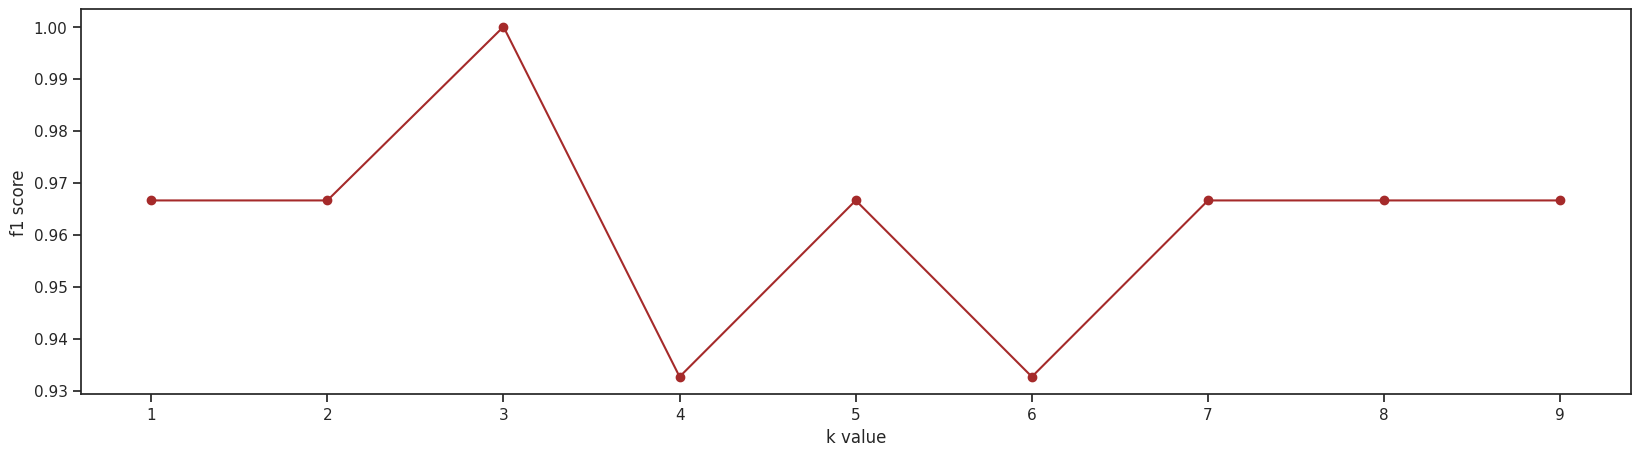

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(k_list,f1_list,marker='o',color='brown')
plt.xlabel("k value")
plt.ylabel("f1 score")

plotting accuracy vs k-value

Text(0, 0.5, 'acc ')

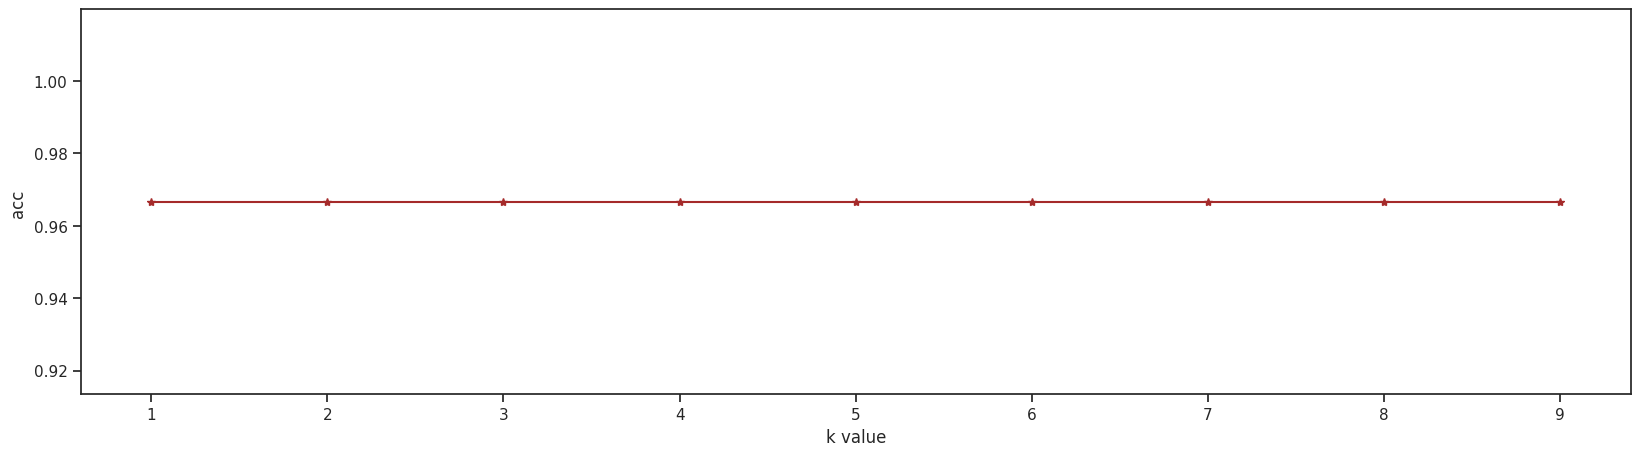

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(k_list,acc_list,marker='*',color='brown')
plt.xlabel("k value")
plt.ylabel("acc ")

In [ ]:
best_f1_score= max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]
print("Optimum K value=",best_k,"with F1-score",best_f1_score)

Optimum K value= 3 with F1-score 1.0


Optimum value of k turned out to be 3 (by looking at the graph) and also by calculating above

CHCEKING Doing for k=3 (PERFORMANCE CHECKING)

In [ ]:
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_model.fit(X_train,y_train)
y_new_pred=KNN_model.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
newresult=confusion_matrix(y_val,y_new_pred)
print("Confusion Matrix")
print(newresult)
newresult1=classification_report(y_val,y_new_pred)
print("Classification Report:")
print(newresult1)
newresult2=accuracy_score(y_val,y_new_pred)
print("Accuracy:",newresult2)

Confusion Matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


Accuracy is 100%